<a href="https://colab.research.google.com/github/mjtalaska/Handwritten-Characters-GAN/blob/main/LettersGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"mariajtalaka","key":"d80e8d2b013a35903ba323f20d5b3709"}'}

In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list

mkdir: cannot create directory ‘/root/.kaggle’: File exists
ref                                                            title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
salvatorerastelli/spotify-and-youtube                          Spotify and Youtube                                   9MB  2023-03-20 15:43:25          10842        385  1.0              
arnabchaki/data-science-salaries-2023                          Data Science Salaries 2023  💸                        25KB  2023-04-13 09:55:16           4806        115  1.0              
erdemtaha/cancer-data                                          Cancer Data                                          49KB  2023-03-22 07:57:00           5370        110  1.0              
evang

In [4]:
 !kaggle datasets download -d sachinpatel21/az-handwritten-alphabets-in-csv-format
 !mkdir alphabets
 !unzip az-handwritten-alphabets-in-csv-format.zip -d alphabets

az-handwritten-alphabets-in-csv-format.zip: Skipping, found more recently modified local copy (use --force to force download)
mkdir: cannot create directory ‘alphabets’: File exists
Archive:  az-handwritten-alphabets-in-csv-format.zip
replace alphabets/A_Z Handwritten Data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [5]:
import pandas as pd
import numpy as np
data = pd.read_csv('alphabets/A_Z Handwritten Data.csv').astype('float32')
data.describe()

0       0.1       0.2       0.3       0.4       0.5  \
count  372450.000000  372450.0  372450.0  372450.0  372450.0  372450.0   
mean       13.523490       0.0       0.0       0.0       0.0       0.0   
std         6.740824       0.0       0.0       0.0       0.0       0.0   
min         0.000000       0.0       0.0       0.0       0.0       0.0   
25%        10.000000       0.0       0.0       0.0       0.0       0.0   
50%        14.000000       0.0       0.0       0.0       0.0       0.0   
75%        18.000000       0.0       0.0       0.0       0.0       0.0   
max        25.000000       0.0       0.0       0.0       0.0       0.0   

            0.6       0.7       0.8       0.9  ...          0.639  \
count  372450.0  372450.0  372450.0  372450.0  ...  372450.000000   
mean        0.0       0.0       0.0       0.0  ...       0.001616   
std         0.0       0.0       0.0       0.0  ...       0.490788   
min         0.0       0.0       0.0       0.0  ...       0.000000   
25%         0.0       0.0       0.0       0.0  ...       0.000000   
50%         0.0       0.0       0.0       0.0  ...       0.000000   
75%         0.0       0.0       0.0       0.0  ...       0.000000   
max         0.0       0.0       0.0       0.0  ...     252.000000   

               0.640          0.641          0.642          0.643  \
count  372450.000000  372450.000000  372450.000000  372450.000000   
mean        0.001592       0.001117       0.000929       0.000685   
std         0.517297       0.421332       0.419180       0.385566   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max       226.000000     229.000000     228.000000     235.000000   

               0.644          0.645          0.646          0.647  \
count  372450.000000  372450.000000  372450.000000  372450.000000   
mean        0.000596       0.000618       0.000690       0.000239   
std         0.319820       0.208942       0.335227       0.134852   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max       194.000000     103.000000     198.000000      82.000000   

               0.648  
count  372450.000000  
mean        0.000011  
std         0.006554  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         4.000000  

[8 rows x 785 columns]

In [6]:
x_train = data.drop('0', axis=1)
y = data['0']
x_train /= 255

In [7]:
x_train = np.reshape(x_train.values, (x_train.shape[0],28,28,1))

In [8]:
from keras.utils import plot_model

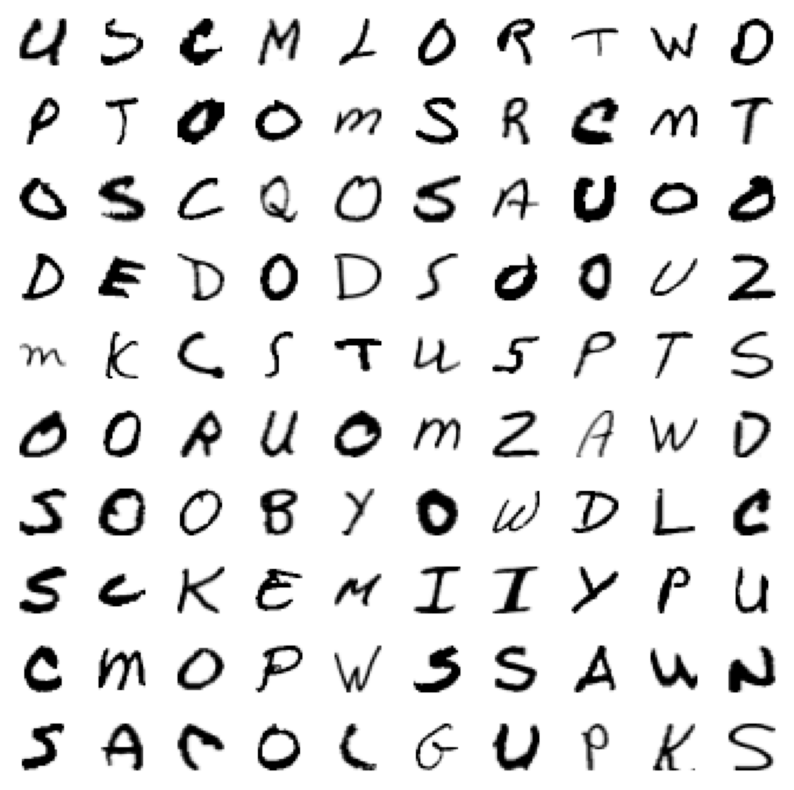

In [9]:
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

x_train = shuffle(x_train, random_state=123)
plt.figure(figsize=(10, 10))
for i in range(100):
    ax = plt.subplot(10, 10, i + 1)
    plt.imshow(x_train[i], cmap="Greys")
    plt.axis("off")
plt.show()

In [10]:
image_size = x_train.shape[1]
latent_dim = 100
batch_size = 64
lr = 2e-4
decay = 6e-8
input_shape = (image_size, image_size, 1)
kernel_size = 5
filters_generator = [1, 32, 64, 128]
filters_discriminator = [32, 64, 128, 256]

In [11]:
from keras.engine.training import Model
from keras.layers import Dense, Conv2DTranspose, BatchNormalization, Activation, Reshape
def create_generator(filters, kernel, image_size, inputs):
  resize = image_size // 4
  print(resize)
  x = Dense(resize * resize * filters[-1])(inputs)
  x = Reshape((resize, resize, filters[-1]))(x)
  for f in filters[::-1]:
    if f > filters[1]:
      strides = 2
    else: 
      strides = 1
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2DTranspose(filters=f, kernel_size=kernel, strides=strides, padding='same')(x)
  x = Activation('sigmoid')(x)
  generator = Model(inputs, x, name='generator')
  return generator

In [12]:
from keras.layers import LeakyReLU, Conv2D, Flatten
def create_discriminator(filters, kernel, image_size, inputs, alpha):
  x = inputs
  for f in filters:
    if f == filters[-1]:
      strides = 1
    else:
      strides = 2
    x = LeakyReLU(alpha=alpha)(x)
    x = Conv2D(filters=f, kernel_size=kernel, strides=strides, padding='same')(x)
  x = Flatten()(x)
  x = Dense(1)(x)
  x = Activation('sigmoid')(x)
  discriminator = Model(inputs, x, name='discriminator')
  return discriminator

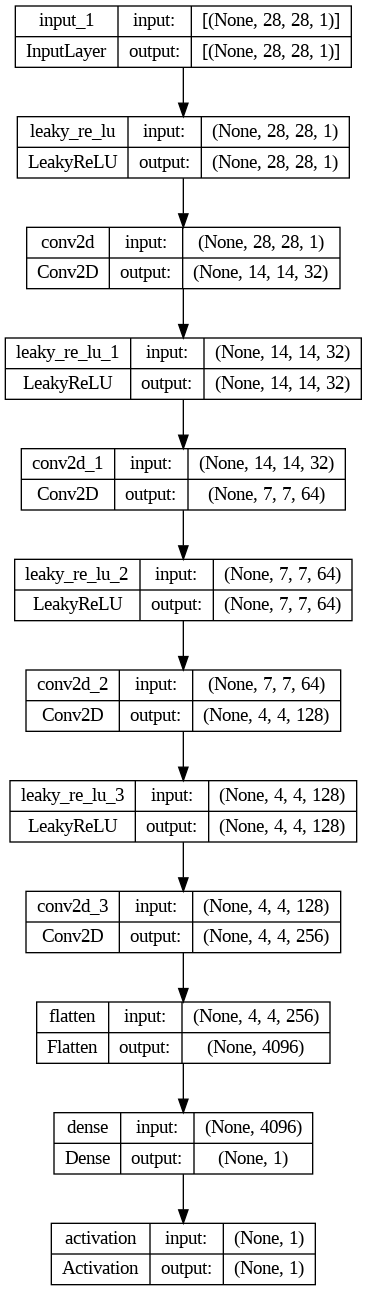

In [13]:
from keras.optimizers import RMSprop
from keras.layers import Input
inputs = Input(shape=input_shape)
discriminator = create_discriminator(filters_discriminator, kernel_size, image_size, inputs, 0.2)
discriminator.compile(loss='binary_crossentropy', optimizer=RMSprop(learning_rate=lr, decay=decay), metrics=['accuracy'])
plot_model(discriminator, show_shapes=True)

7


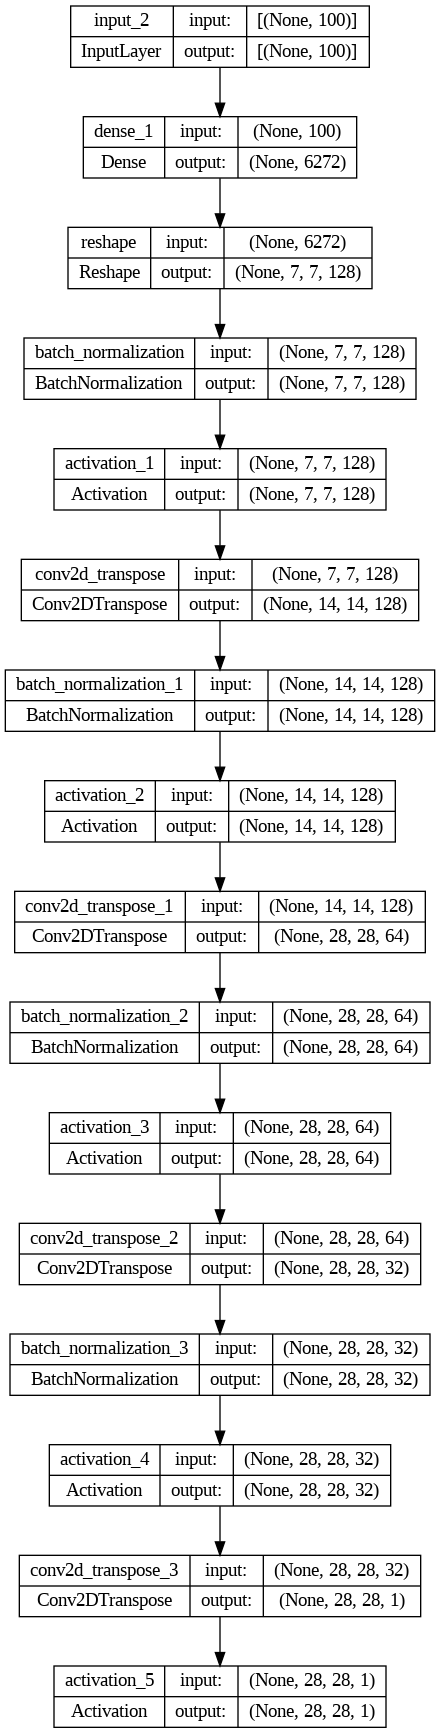

In [14]:
inputs = (latent_dim, )
inputs = Input(shape=inputs)
generator = create_generator(filters_generator, kernel_size, image_size, inputs)
plot_model(generator, show_shapes=True)

In [15]:
optimizer = RMSprop(learning_rate=lr*0.5, decay=decay*0.5)
discriminator.trainable = False

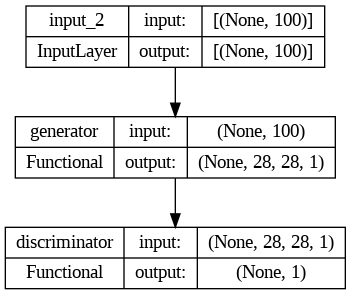

In [16]:
adversial = Model(inputs, discriminator(generator(inputs)), name='adversial_model')
plot_model(adversial, show_shapes=True)

In [17]:
from google.colab import drive

drive.mount('/content/gdrive')

generator.load_weights('/content/gdrive/MyDrive/letters_GAN.h5')

adversial.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
adversial.summary()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Model: "adversial_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 100)]             0         
                                                                 
 generator (Functional)      (None, 28, 28, 1)         1301505   
                                                                 
 discriminator (Functional)  (None, 1)                 1080577   
                                                                 
Total params: 2,382,082
Trainable params: 1,300,801
Non-trainable params: 1,081,281
_________________________________________________________________


In [18]:
def plot_letters(generator, noise, step):
  images = generator.predict(noise)
  image_size = images.shape[1]
  plt.figure(figsize=(2.2, 2.2))
  for i in range(16):
    plt.subplot(4, 4, i + 1)
    image = np.reshape(images[i], [image_size, image_size])
    plt.imshow(image, cmap='gray')
    plt.axis('off')
  plt.show()

In [19]:
def train(x_train, generator, discriminator, adversial, batch_size, latent_dim, train_steps, save_interval=500):
  noise_for_plot = np.random.uniform(-1.0, 1.0, size=[16, latent_dim])
  train_size = x_train.shape[0]
  for step in range(train_steps):
    rand_idx = np.random.randint(0, train_size, size=batch_size)
    real = x_train[rand_idx]
    noise = np.random.uniform(-1.0, 1.0, size=[batch_size, latent_dim])
    fake = generator.predict(noise)
    x = np.concatenate((real, fake))
    y = np.ones([batch_size*2, 1])
    y[batch_size:, : ] = 0.0
    loss, acc = discriminator.train_on_batch(x, y)
    print(f"{step + 1}: Discriminator loss = {loss}, accuracy = {acc}")

    noise = np.random.uniform(-1.0, 1.0, size=[batch_size, latent_dim])
    y = np.ones([batch_size, 1])
    loss, acc = adversial.train_on_batch(noise, y)
    print(f"Adversial loss = {loss}, accuracy = {acc}")
    if (step + 1) % save_interval == 0:
      plot_letters(generator, noise_for_plot, step)
      generator.save('/content/gdrive/MyDrive/letters_GAN' + ".h5")

2/2 [==============================] - 3s 6ms/step
1: Discriminator loss = 0.6926522254943848, accuracy = 0.5390625
Adversial loss = 0.6852573752403259, accuracy = 0.546875
2/2 [==============================] - 0s 8ms/step
2: Discriminator loss = 0.6983225345611572, accuracy = 0.4453125
Adversial loss = 0.7378392219543457, accuracy = 0.03125
2/2 [==============================] - 0s 5ms/step
3: Discriminator loss = 0.6967877149581909, accuracy = 0.4921875
Adversial loss = 0.6776204705238342, accuracy = 0.703125
2/2 [==============================] - 0s 9ms/step
4: Discriminator loss = 0.6959351301193237, accuracy = 0.5078125
Adversial loss = 0.6840472221374512, accuracy = 0.71875
2/2 [==============================] - 0s 5ms/step
5: Discriminator loss = 0.6907709836959839, accuracy = 0.5
Adversial loss = 0.6733748912811279, accuracy = 0.796875
2/2 [==============================] - 0s 5ms/step
6: Discriminator loss = 0.6944186091423035, accuracy = 0.484375
Adversial loss = 0.732886195

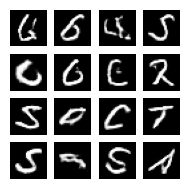

2/2 [==============================] - 0s 7ms/step
501: Discriminator loss = 0.692700982093811, accuracy = 0.4921875
Adversial loss = 0.7007194757461548, accuracy = 0.328125
2/2 [==============================] - 0s 6ms/step
502: Discriminator loss = 0.6967463493347168, accuracy = 0.3828125
Adversial loss = 0.6962467432022095, accuracy = 0.453125
2/2 [==============================] - 0s 7ms/step
503: Discriminator loss = 0.6927542686462402, accuracy = 0.4765625
Adversial loss = 0.7001777291297913, accuracy = 0.234375
2/2 [==============================] - 0s 12ms/step
504: Discriminator loss = 0.6930384635925293, accuracy = 0.5234375
Adversial loss = 0.6968117356300354, accuracy = 0.40625
2/2 [==============================] - 0s 4ms/step
505: Discriminator loss = 0.6903660893440247, accuracy = 0.578125
Adversial loss = 0.6964553594589233, accuracy = 0.3125
2/2 [==============================] - 0s 6ms/step
506: Discriminator loss = 0.6917306184768677, accuracy = 0.5390625
Adversial l

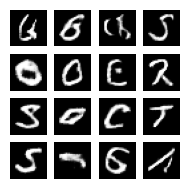

2/2 [==============================] - 0s 8ms/step
1001: Discriminator loss = 0.6950435042381287, accuracy = 0.4765625
Adversial loss = 0.691472053527832, accuracy = 0.53125
2/2 [==============================] - 0s 10ms/step
1002: Discriminator loss = 0.6926929354667664, accuracy = 0.53125
Adversial loss = 0.6997845768928528, accuracy = 0.328125
2/2 [==============================] - 0s 5ms/step
1003: Discriminator loss = 0.6915677785873413, accuracy = 0.5625
Adversial loss = 0.6901671290397644, accuracy = 0.59375
2/2 [==============================] - 0s 9ms/step
1004: Discriminator loss = 0.6978145241737366, accuracy = 0.375
Adversial loss = 0.7009093761444092, accuracy = 0.359375
2/2 [==============================] - 0s 7ms/step
1005: Discriminator loss = 0.6926053762435913, accuracy = 0.53125
Adversial loss = 0.696905255317688, accuracy = 0.375
2/2 [==============================] - 0s 9ms/step
1006: Discriminator loss = 0.693313717842102, accuracy = 0.515625
Adversial loss = 0.6

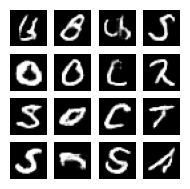

2/2 [==============================] - 0s 4ms/step
1501: Discriminator loss = 0.6983853578567505, accuracy = 0.3828125
Adversial loss = 0.7073317170143127, accuracy = 0.234375
2/2 [==============================] - 0s 8ms/step
1502: Discriminator loss = 0.6964991688728333, accuracy = 0.4921875
Adversial loss = 0.7070627212524414, accuracy = 0.3125
2/2 [==============================] - 0s 11ms/step
1503: Discriminator loss = 0.6943826675415039, accuracy = 0.46875
Adversial loss = 0.6950286030769348, accuracy = 0.5
2/2 [==============================] - 0s 6ms/step
1504: Discriminator loss = 0.6947703957557678, accuracy = 0.453125
Adversial loss = 0.703792154788971, accuracy = 0.265625
2/2 [==============================] - 0s 5ms/step
1505: Discriminator loss = 0.6959500312805176, accuracy = 0.4609375
Adversial loss = 0.6962317228317261, accuracy = 0.515625
2/2 [==============================] - 0s 10ms/step
1506: Discriminator loss = 0.692057728767395, accuracy = 0.5625
Adversial loss

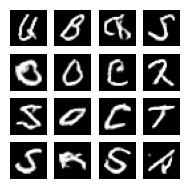

2/2 [==============================] - 0s 9ms/step
2001: Discriminator loss = 0.6942837238311768, accuracy = 0.453125
Adversial loss = 0.7104028463363647, accuracy = 0.28125
2/2 [==============================] - 0s 7ms/step
2002: Discriminator loss = 0.692365825176239, accuracy = 0.5
Adversial loss = 0.7175896167755127, accuracy = 0.28125
2/2 [==============================] - 0s 5ms/step
2003: Discriminator loss = 0.6960049867630005, accuracy = 0.546875
Adversial loss = 0.6736270785331726, accuracy = 0.78125
2/2 [==============================] - 0s 9ms/step
2004: Discriminator loss = 0.6930292248725891, accuracy = 0.5078125
Adversial loss = 0.7062016725540161, accuracy = 0.375
2/2 [==============================] - 0s 6ms/step
2005: Discriminator loss = 0.6923779249191284, accuracy = 0.6015625
Adversial loss = 0.6801835894584656, accuracy = 0.65625
2/2 [==============================] - 0s 6ms/step
2006: Discriminator loss = 0.6940598487854004, accuracy = 0.4921875
Adversial loss = 

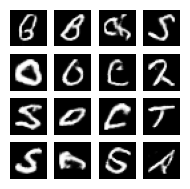

2/2 [==============================] - 0s 5ms/step
2501: Discriminator loss = 0.6965160965919495, accuracy = 0.4609375
Adversial loss = 0.7163927555084229, accuracy = 0.296875
2/2 [==============================] - 0s 5ms/step
2502: Discriminator loss = 0.6917433142662048, accuracy = 0.5234375
Adversial loss = 0.6414578557014465, accuracy = 0.953125
2/2 [==============================] - 0s 10ms/step
2503: Discriminator loss = 0.6940887570381165, accuracy = 0.4453125
Adversial loss = 0.6604925394058228, accuracy = 0.796875
2/2 [==============================] - 0s 11ms/step
2504: Discriminator loss = 0.6890819072723389, accuracy = 0.53125
Adversial loss = 0.6597640514373779, accuracy = 0.875
2/2 [==============================] - 0s 5ms/step
2505: Discriminator loss = 0.6858806610107422, accuracy = 0.4609375
Adversial loss = 0.6653974056243896, accuracy = 0.734375
2/2 [==============================] - 0s 7ms/step
2506: Discriminator loss = 0.6888397932052612, accuracy = 0.5546875
Adve

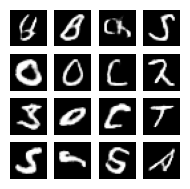

2/2 [==============================] - 0s 10ms/step
3001: Discriminator loss = 0.696670413017273, accuracy = 0.53125
Adversial loss = 0.6615194082260132, accuracy = 0.796875
2/2 [==============================] - 0s 14ms/step
3002: Discriminator loss = 0.6813218593597412, accuracy = 0.5390625
Adversial loss = 0.6995702981948853, accuracy = 0.390625
2/2 [==============================] - 0s 5ms/step
3003: Discriminator loss = 0.6979223489761353, accuracy = 0.5078125
Adversial loss = 0.6518881916999817, accuracy = 0.703125
2/2 [==============================] - 0s 6ms/step
3004: Discriminator loss = 0.6959512233734131, accuracy = 0.46875
Adversial loss = 0.8051133155822754, accuracy = 0.046875
2/2 [==============================] - 0s 7ms/step
3005: Discriminator loss = 0.6990872621536255, accuracy = 0.4921875
Adversial loss = 0.6387447118759155, accuracy = 0.921875
2/2 [==============================] - 0s 5ms/step
3006: Discriminator loss = 0.6836152672767639, accuracy = 0.5859375
Adve

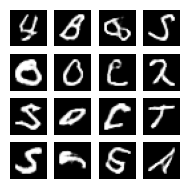

2/2 [==============================] - 0s 13ms/step
3501: Discriminator loss = 0.6957515478134155, accuracy = 0.4765625
Adversial loss = 0.5859731435775757, accuracy = 0.921875
2/2 [==============================] - 0s 13ms/step
3502: Discriminator loss = 0.7140222787857056, accuracy = 0.5
Adversial loss = 0.7683863043785095, accuracy = 0.0625
2/2 [==============================] - 0s 4ms/step
3503: Discriminator loss = 0.6958675384521484, accuracy = 0.4921875
Adversial loss = 0.6785207986831665, accuracy = 0.640625
2/2 [==============================] - 0s 10ms/step
3504: Discriminator loss = 0.6962863206863403, accuracy = 0.515625
Adversial loss = 0.7682081460952759, accuracy = 0.125
2/2 [==============================] - 0s 7ms/step
3505: Discriminator loss = 0.6845707893371582, accuracy = 0.53125
Adversial loss = 0.7162621021270752, accuracy = 0.359375
2/2 [==============================] - 0s 10ms/step
3506: Discriminator loss = 0.6875723600387573, accuracy = 0.5546875
Adversial l

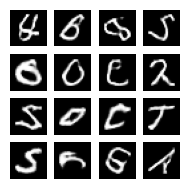

2/2 [==============================] - 0s 7ms/step
4001: Discriminator loss = 0.673248291015625, accuracy = 0.5703125
Adversial loss = 0.744255781173706, accuracy = 0.3125
2/2 [==============================] - 0s 11ms/step
4002: Discriminator loss = 0.6901584267616272, accuracy = 0.5703125
Adversial loss = 0.572602391242981, accuracy = 0.890625
2/2 [==============================] - 0s 8ms/step
4003: Discriminator loss = 0.6832956671714783, accuracy = 0.59375
Adversial loss = 0.7410867214202881, accuracy = 0.28125
2/2 [==============================] - 0s 6ms/step
4004: Discriminator loss = 0.6845519542694092, accuracy = 0.546875
Adversial loss = 0.6464386582374573, accuracy = 0.71875
2/2 [==============================] - 0s 6ms/step
4005: Discriminator loss = 0.6825177669525146, accuracy = 0.5859375
Adversial loss = 0.7642642855644226, accuracy = 0.234375
2/2 [==============================] - 0s 10ms/step
4006: Discriminator loss = 0.6857051849365234, accuracy = 0.5859375
Adversial

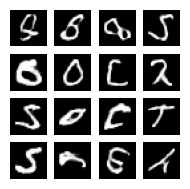

2/2 [==============================] - 0s 5ms/step
4501: Discriminator loss = 0.6828867793083191, accuracy = 0.5390625
Adversial loss = 0.7344965934753418, accuracy = 0.390625
2/2 [==============================] - 0s 7ms/step
4502: Discriminator loss = 0.6879985928535461, accuracy = 0.5546875
Adversial loss = 0.7755802869796753, accuracy = 0.25
2/2 [==============================] - 0s 5ms/step
4503: Discriminator loss = 0.6896496415138245, accuracy = 0.5234375
Adversial loss = 0.6676657199859619, accuracy = 0.5625
2/2 [==============================] - 0s 11ms/step
4504: Discriminator loss = 0.6748949885368347, accuracy = 0.6015625
Adversial loss = 0.7598010301589966, accuracy = 0.40625
2/2 [==============================] - 0s 7ms/step
4505: Discriminator loss = 0.6783995628356934, accuracy = 0.5703125
Adversial loss = 0.5521064400672913, accuracy = 0.890625
2/2 [==============================] - 0s 9ms/step
4506: Discriminator loss = 0.6753673553466797, accuracy = 0.5546875
Adversi

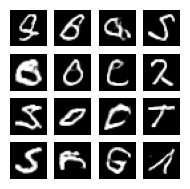

2/2 [==============================] - 0s 6ms/step
5001: Discriminator loss = 0.6554416418075562, accuracy = 0.6015625
Adversial loss = 0.6795265674591064, accuracy = 0.53125
2/2 [==============================] - 0s 10ms/step
5002: Discriminator loss = 0.6777082681655884, accuracy = 0.5546875
Adversial loss = 0.8071990013122559, accuracy = 0.34375
2/2 [==============================] - 0s 9ms/step
5003: Discriminator loss = 0.7018490433692932, accuracy = 0.4921875
Adversial loss = 0.6493560075759888, accuracy = 0.71875
2/2 [==============================] - 0s 12ms/step
5004: Discriminator loss = 0.6985890865325928, accuracy = 0.453125
Adversial loss = 0.8700224161148071, accuracy = 0.078125
2/2 [==============================] - 0s 10ms/step
5005: Discriminator loss = 0.6973669528961182, accuracy = 0.515625
Adversial loss = 0.5776901841163635, accuracy = 0.90625
2/2 [==============================] - 0s 7ms/step
5006: Discriminator loss = 0.6907844543457031, accuracy = 0.5234375
Adve

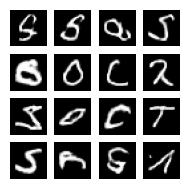

2/2 [==============================] - 0s 9ms/step
5501: Discriminator loss = 0.6673392057418823, accuracy = 0.578125
Adversial loss = 0.7540391683578491, accuracy = 0.3125
2/2 [==============================] - 0s 5ms/step
5502: Discriminator loss = 0.6717384457588196, accuracy = 0.6171875
Adversial loss = 0.759811520576477, accuracy = 0.375
2/2 [==============================] - 0s 12ms/step
5503: Discriminator loss = 0.6724119186401367, accuracy = 0.625
Adversial loss = 0.8160207271575928, accuracy = 0.25
2/2 [==============================] - 0s 8ms/step
5504: Discriminator loss = 0.6644380688667297, accuracy = 0.59375
Adversial loss = 0.7330068349838257, accuracy = 0.484375
2/2 [==============================] - 0s 8ms/step
5505: Discriminator loss = 0.6964442729949951, accuracy = 0.5390625
Adversial loss = 0.7530314326286316, accuracy = 0.328125
2/2 [==============================] - 0s 7ms/step
5506: Discriminator loss = 0.6784707307815552, accuracy = 0.5390625
Adversial loss = 

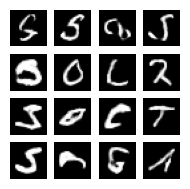

2/2 [==============================] - 0s 5ms/step
6001: Discriminator loss = 0.6458700895309448, accuracy = 0.6015625
Adversial loss = 0.5940170288085938, accuracy = 0.8125
2/2 [==============================] - 0s 11ms/step
6002: Discriminator loss = 0.7143141031265259, accuracy = 0.4765625
Adversial loss = 1.101973056793213, accuracy = 0.015625
2/2 [==============================] - 0s 4ms/step
6003: Discriminator loss = 0.7083160877227783, accuracy = 0.5078125
Adversial loss = 0.5029668807983398, accuracy = 0.953125
2/2 [==============================] - 0s 9ms/step
6004: Discriminator loss = 0.7037370800971985, accuracy = 0.515625
Adversial loss = 0.9488837122917175, accuracy = 0.046875
2/2 [==============================] - 0s 7ms/step
6005: Discriminator loss = 0.6911259889602661, accuracy = 0.546875
Adversial loss = 0.6657622456550598, accuracy = 0.5625
2/2 [==============================] - 0s 5ms/step
6006: Discriminator loss = 0.6857271194458008, accuracy = 0.5703125
Adversi

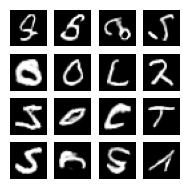

2/2 [==============================] - 0s 10ms/step
6501: Discriminator loss = 0.6803575158119202, accuracy = 0.5546875
Adversial loss = 0.8256109952926636, accuracy = 0.28125
2/2 [==============================] - 0s 10ms/step
6502: Discriminator loss = 0.6593922972679138, accuracy = 0.625
Adversial loss = 0.6786733865737915, accuracy = 0.578125
2/2 [==============================] - 0s 8ms/step
6503: Discriminator loss = 0.6756094694137573, accuracy = 0.5859375
Adversial loss = 0.8366228342056274, accuracy = 0.265625
2/2 [==============================] - 0s 6ms/step
6504: Discriminator loss = 0.6610052585601807, accuracy = 0.640625
Adversial loss = 0.7293927669525146, accuracy = 0.46875
2/2 [==============================] - 0s 6ms/step
6505: Discriminator loss = 0.6926203966140747, accuracy = 0.546875
Adversial loss = 0.9161511659622192, accuracy = 0.078125
2/2 [==============================] - 0s 5ms/step
6506: Discriminator loss = 0.680281937122345, accuracy = 0.53125
Adversial 

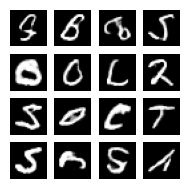

2/2 [==============================] - 0s 11ms/step
7001: Discriminator loss = 0.6654412746429443, accuracy = 0.5859375
Adversial loss = 0.6105583310127258, accuracy = 0.71875
2/2 [==============================] - 0s 13ms/step
7002: Discriminator loss = 0.6835611462593079, accuracy = 0.5234375
Adversial loss = 0.9256090521812439, accuracy = 0.09375
2/2 [==============================] - 0s 9ms/step
7003: Discriminator loss = 0.678139865398407, accuracy = 0.5859375
Adversial loss = 0.6377964019775391, accuracy = 0.671875
2/2 [==============================] - 0s 12ms/step
7004: Discriminator loss = 0.6645236015319824, accuracy = 0.5703125
Adversial loss = 1.0068230628967285, accuracy = 0.046875
2/2 [==============================] - 0s 6ms/step
7005: Discriminator loss = 0.665497899055481, accuracy = 0.5859375
Adversial loss = 0.6076781749725342, accuracy = 0.796875
2/2 [==============================] - 0s 7ms/step
7006: Discriminator loss = 0.673201322555542, accuracy = 0.5234375
Adv

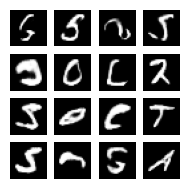

2/2 [==============================] - 0s 10ms/step
7501: Discriminator loss = 0.6286065578460693, accuracy = 0.6640625
Adversial loss = 0.48739001154899597, accuracy = 0.828125
2/2 [==============================] - 0s 6ms/step
7502: Discriminator loss = 0.6631835699081421, accuracy = 0.6171875
Adversial loss = 0.7719481587409973, accuracy = 0.484375
2/2 [==============================] - 0s 6ms/step
7503: Discriminator loss = 0.6627331972122192, accuracy = 0.59375
Adversial loss = 0.5200148820877075, accuracy = 0.828125
2/2 [==============================] - 0s 5ms/step
7504: Discriminator loss = 0.6153767108917236, accuracy = 0.6953125
Adversial loss = 1.0755723714828491, accuracy = 0.09375
2/2 [==============================] - 0s 10ms/step
7505: Discriminator loss = 0.674909234046936, accuracy = 0.5703125
Adversial loss = 0.38424891233444214, accuracy = 0.984375
2/2 [==============================] - 0s 7ms/step
7506: Discriminator loss = 0.7567397356033325, accuracy = 0.53125
Adv

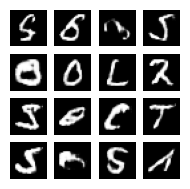

2/2 [==============================] - 0s 7ms/step
8001: Discriminator loss = 0.6032875180244446, accuracy = 0.671875
Adversial loss = 0.6550546884536743, accuracy = 0.65625
2/2 [==============================] - 0s 6ms/step
8002: Discriminator loss = 0.5882920026779175, accuracy = 0.671875
Adversial loss = 1.5798966884613037, accuracy = 0.015625
2/2 [==============================] - 0s 12ms/step
8003: Discriminator loss = 0.6286839842796326, accuracy = 0.6484375
Adversial loss = 0.6237319707870483, accuracy = 0.640625
2/2 [==============================] - 0s 15ms/step
8004: Discriminator loss = 0.6041796207427979, accuracy = 0.5703125
Adversial loss = 1.5847505331039429, accuracy = 0.0
2/2 [==============================] - 0s 9ms/step
8005: Discriminator loss = 0.6016156673431396, accuracy = 0.6875
Adversial loss = 0.6647554636001587, accuracy = 0.578125
2/2 [==============================] - 0s 5ms/step
8006: Discriminator loss = 0.5461666584014893, accuracy = 0.7734375
Adversial 

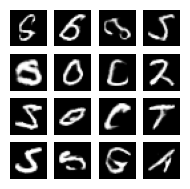

2/2 [==============================] - 0s 5ms/step
8501: Discriminator loss = 0.6621260643005371, accuracy = 0.6328125
Adversial loss = 0.8107765913009644, accuracy = 0.296875
2/2 [==============================] - 0s 16ms/step
8502: Discriminator loss = 0.6265034079551697, accuracy = 0.6640625
Adversial loss = 0.7997163534164429, accuracy = 0.25
2/2 [==============================] - 0s 6ms/step
8503: Discriminator loss = 0.6122192144393921, accuracy = 0.703125
Adversial loss = 0.7363934516906738, accuracy = 0.46875
2/2 [==============================] - 0s 8ms/step
8504: Discriminator loss = 0.6640862822532654, accuracy = 0.5859375
Adversial loss = 0.8537144064903259, accuracy = 0.328125
2/2 [==============================] - 0s 5ms/step
8505: Discriminator loss = 0.6232407689094543, accuracy = 0.6328125
Adversial loss = 0.6146986484527588, accuracy = 0.71875
2/2 [==============================] - 0s 6ms/step
8506: Discriminator loss = 0.6165121793746948, accuracy = 0.671875
Adversia

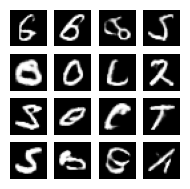

2/2 [==============================] - 0s 10ms/step
9001: Discriminator loss = 0.6160761117935181, accuracy = 0.6640625
Adversial loss = 0.619259238243103, accuracy = 0.640625
2/2 [==============================] - 0s 7ms/step
9002: Discriminator loss = 0.6388202905654907, accuracy = 0.625
Adversial loss = 0.8591753244400024, accuracy = 0.265625
2/2 [==============================] - 0s 5ms/step
9003: Discriminator loss = 0.6529377698898315, accuracy = 0.5625
Adversial loss = 0.6656475067138672, accuracy = 0.640625
2/2 [==============================] - 0s 5ms/step
9004: Discriminator loss = 0.66583251953125, accuracy = 0.5625
Adversial loss = 0.9787086248397827, accuracy = 0.140625
2/2 [==============================] - 0s 7ms/step
9005: Discriminator loss = 0.6716009378433228, accuracy = 0.546875
Adversial loss = 0.7220908403396606, accuracy = 0.453125
2/2 [==============================] - 0s 7ms/step
9006: Discriminator loss = 0.6376524567604065, accuracy = 0.578125
Adversial loss 

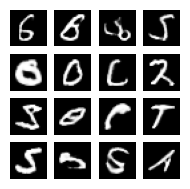

2/2 [==============================] - 0s 5ms/step
9501: Discriminator loss = 0.6461330056190491, accuracy = 0.5703125
Adversial loss = 1.2727770805358887, accuracy = 0.015625
2/2 [==============================] - 0s 9ms/step
9502: Discriminator loss = 0.6396690607070923, accuracy = 0.59375
Adversial loss = 0.6809420585632324, accuracy = 0.59375
2/2 [==============================] - 0s 7ms/step
9503: Discriminator loss = 0.5983617305755615, accuracy = 0.6484375
Adversial loss = 0.974075198173523, accuracy = 0.09375
2/2 [==============================] - 0s 7ms/step
9504: Discriminator loss = 0.6255517601966858, accuracy = 0.671875
Adversial loss = 0.677344560623169, accuracy = 0.546875
2/2 [==============================] - 0s 13ms/step
9505: Discriminator loss = 0.6169398427009583, accuracy = 0.640625
Adversial loss = 0.9028018712997437, accuracy = 0.28125
2/2 [==============================] - 0s 5ms/step
9506: Discriminator loss = 0.658682644367218, accuracy = 0.59375
Adversial lo

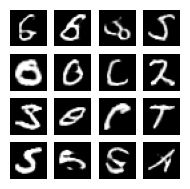

2/2 [==============================] - 0s 5ms/step
10001: Discriminator loss = 0.5896499156951904, accuracy = 0.734375
Adversial loss = 0.8719890713691711, accuracy = 0.296875
2/2 [==============================] - 0s 7ms/step
10002: Discriminator loss = 0.5788397192955017, accuracy = 0.734375
Adversial loss = 0.8377186059951782, accuracy = 0.3125
2/2 [==============================] - 0s 8ms/step
10003: Discriminator loss = 0.6118857264518738, accuracy = 0.6953125
Adversial loss = 1.0023359060287476, accuracy = 0.125
2/2 [==============================] - 0s 8ms/step
10004: Discriminator loss = 0.5908941030502319, accuracy = 0.6953125
Adversial loss = 0.9001172780990601, accuracy = 0.328125
2/2 [==============================] - 0s 6ms/step
10005: Discriminator loss = 0.6375832557678223, accuracy = 0.6796875
Adversial loss = 1.3373496532440186, accuracy = 0.0625
2/2 [==============================] - 0s 7ms/step
10006: Discriminator loss = 0.7283878326416016, accuracy = 0.5546875
Adve

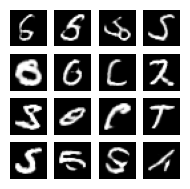

2/2 [==============================] - 0s 6ms/step
10501: Discriminator loss = 0.6113494634628296, accuracy = 0.6953125
Adversial loss = 0.7878698706626892, accuracy = 0.40625
2/2 [==============================] - 0s 5ms/step
10502: Discriminator loss = 0.6540723443031311, accuracy = 0.59375
Adversial loss = 0.9660462141036987, accuracy = 0.25
2/2 [==============================] - 0s 5ms/step
10503: Discriminator loss = 0.5878032445907593, accuracy = 0.65625
Adversial loss = 0.6890451908111572, accuracy = 0.546875
2/2 [==============================] - 0s 5ms/step
10504: Discriminator loss = 0.636166512966156, accuracy = 0.625
Adversial loss = 0.871070384979248, accuracy = 0.328125
2/2 [==============================] - 0s 5ms/step
10505: Discriminator loss = 0.6184791326522827, accuracy = 0.6015625
Adversial loss = 0.7908697128295898, accuracy = 0.40625
2/2 [==============================] - 0s 5ms/step
10506: Discriminator loss = 0.6303932666778564, accuracy = 0.6171875
Adversial l

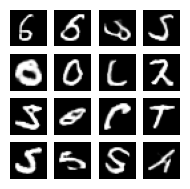

2/2 [==============================] - 0s 7ms/step
11001: Discriminator loss = 0.6549853086471558, accuracy = 0.5859375
Adversial loss = 0.5384810566902161, accuracy = 0.796875
2/2 [==============================] - 0s 5ms/step
11002: Discriminator loss = 0.6354926228523254, accuracy = 0.640625
Adversial loss = 1.2021677494049072, accuracy = 0.03125
2/2 [==============================] - 0s 5ms/step
11003: Discriminator loss = 0.6519334316253662, accuracy = 0.6015625
Adversial loss = 0.456378698348999, accuracy = 0.828125
2/2 [==============================] - 0s 7ms/step
11004: Discriminator loss = 0.6500316858291626, accuracy = 0.6015625
Adversial loss = 1.1553242206573486, accuracy = 0.109375
2/2 [==============================] - 0s 6ms/step
11005: Discriminator loss = 0.6739525198936462, accuracy = 0.6171875
Adversial loss = 0.6272451281547546, accuracy = 0.5625
2/2 [==============================] - 0s 5ms/step
11006: Discriminator loss = 0.6777765154838562, accuracy = 0.578125
A

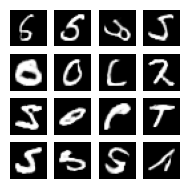

2/2 [==============================] - 0s 7ms/step
11501: Discriminator loss = 0.6829182505607605, accuracy = 0.6015625
Adversial loss = 0.464253306388855, accuracy = 0.859375
2/2 [==============================] - 0s 4ms/step
11502: Discriminator loss = 0.6626452207565308, accuracy = 0.6015625
Adversial loss = 1.270620584487915, accuracy = 0.09375
2/2 [==============================] - 0s 7ms/step
11503: Discriminator loss = 0.6415356993675232, accuracy = 0.625
Adversial loss = 0.771929919719696, accuracy = 0.40625
2/2 [==============================] - 0s 4ms/step
11504: Discriminator loss = 0.5600458979606628, accuracy = 0.765625
Adversial loss = 0.950492262840271, accuracy = 0.171875
2/2 [==============================] - 0s 7ms/step
11505: Discriminator loss = 0.5624337196350098, accuracy = 0.6953125
Adversial loss = 0.7933301329612732, accuracy = 0.46875
2/2 [==============================] - 0s 5ms/step
11506: Discriminator loss = 0.5698369741439819, accuracy = 0.7265625
Adversi

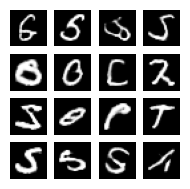

2/2 [==============================] - 0s 7ms/step
12001: Discriminator loss = 0.6088494062423706, accuracy = 0.65625
Adversial loss = 1.0136303901672363, accuracy = 0.25
2/2 [==============================] - 0s 4ms/step
12002: Discriminator loss = 0.6069114208221436, accuracy = 0.7265625
Adversial loss = 0.7059400677680969, accuracy = 0.515625
2/2 [==============================] - 0s 5ms/step
12003: Discriminator loss = 0.6700053215026855, accuracy = 0.578125
Adversial loss = 1.1056756973266602, accuracy = 0.15625
2/2 [==============================] - 0s 5ms/step
12004: Discriminator loss = 0.60812908411026, accuracy = 0.65625
Adversial loss = 0.7204062938690186, accuracy = 0.515625
2/2 [==============================] - 0s 7ms/step
12005: Discriminator loss = 0.6539227962493896, accuracy = 0.640625
Adversial loss = 1.3531397581100464, accuracy = 0.03125
2/2 [==============================] - 0s 7ms/step
12006: Discriminator loss = 0.6523420810699463, accuracy = 0.5546875
Adversial

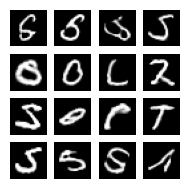

2/2 [==============================] - 0s 7ms/step
12501: Discriminator loss = 0.6370332837104797, accuracy = 0.6015625
Adversial loss = 0.8367820978164673, accuracy = 0.328125
2/2 [==============================] - 0s 7ms/step
12502: Discriminator loss = 0.624396562576294, accuracy = 0.59375
Adversial loss = 1.369123935699463, accuracy = 0.046875
2/2 [==============================] - 0s 5ms/step
12503: Discriminator loss = 0.6313715577125549, accuracy = 0.6640625
Adversial loss = 0.7407479882240295, accuracy = 0.4375
2/2 [==============================] - 0s 5ms/step
12504: Discriminator loss = 0.6484744548797607, accuracy = 0.625
Adversial loss = 1.0353894233703613, accuracy = 0.171875
2/2 [==============================] - 0s 8ms/step
12505: Discriminator loss = 0.6613762378692627, accuracy = 0.609375
Adversial loss = 0.8886529207229614, accuracy = 0.296875
2/2 [==============================] - 0s 6ms/step
12506: Discriminator loss = 0.6253531575202942, accuracy = 0.6328125
Advers

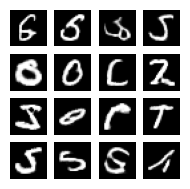

2/2 [==============================] - 0s 5ms/step
13001: Discriminator loss = 0.6556234359741211, accuracy = 0.6484375
Adversial loss = 0.5935280323028564, accuracy = 0.734375
2/2 [==============================] - 0s 6ms/step
13002: Discriminator loss = 0.6446881294250488, accuracy = 0.59375
Adversial loss = 1.2409425973892212, accuracy = 0.0625
2/2 [==============================] - 0s 7ms/step
13003: Discriminator loss = 0.5825906991958618, accuracy = 0.734375
Adversial loss = 0.8088036775588989, accuracy = 0.453125
2/2 [==============================] - 0s 9ms/step
13004: Discriminator loss = 0.6233155727386475, accuracy = 0.578125
Adversial loss = 1.2636139392852783, accuracy = 0.109375
2/2 [==============================] - 0s 7ms/step
13005: Discriminator loss = 0.6243809461593628, accuracy = 0.6484375
Adversial loss = 0.8299253582954407, accuracy = 0.421875
2/2 [==============================] - 0s 8ms/step
13006: Discriminator loss = 0.5656951665878296, accuracy = 0.7109375
A

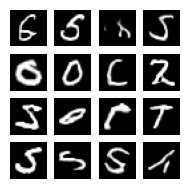

2/2 [==============================] - 0s 12ms/step
13501: Discriminator loss = 0.5773358345031738, accuracy = 0.7265625
Adversial loss = 0.7001833915710449, accuracy = 0.53125
2/2 [==============================] - 0s 12ms/step
13502: Discriminator loss = 0.6594817638397217, accuracy = 0.59375
Adversial loss = 1.2387018203735352, accuracy = 0.0625
2/2 [==============================] - 0s 8ms/step
13503: Discriminator loss = 0.6442301273345947, accuracy = 0.65625
Adversial loss = 0.5981366634368896, accuracy = 0.71875
2/2 [==============================] - 0s 9ms/step
13504: Discriminator loss = 0.6131466627120972, accuracy = 0.6640625
Adversial loss = 1.08640456199646, accuracy = 0.125
2/2 [==============================] - 0s 11ms/step
13505: Discriminator loss = 0.640846312046051, accuracy = 0.640625
Adversial loss = 0.698045015335083, accuracy = 0.515625
2/2 [==============================] - 0s 10ms/step
13506: Discriminator loss = 0.6435171365737915, accuracy = 0.5859375
Adversi

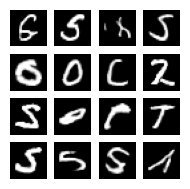

2/2 [==============================] - 0s 8ms/step
14001: Discriminator loss = 0.6820474863052368, accuracy = 0.609375
Adversial loss = 1.3419487476348877, accuracy = 0.03125
2/2 [==============================] - 0s 5ms/step
14002: Discriminator loss = 0.6460373997688293, accuracy = 0.625
Adversial loss = 0.6853057146072388, accuracy = 0.546875
2/2 [==============================] - 0s 5ms/step
14003: Discriminator loss = 0.5812351703643799, accuracy = 0.6640625
Adversial loss = 1.2203524112701416, accuracy = 0.15625
2/2 [==============================] - 0s 5ms/step
14004: Discriminator loss = 0.5826800465583801, accuracy = 0.71875
Adversial loss = 0.5716081857681274, accuracy = 0.703125
2/2 [==============================] - 0s 5ms/step
14005: Discriminator loss = 0.6648925542831421, accuracy = 0.609375
Adversial loss = 1.030888557434082, accuracy = 0.1875
2/2 [==============================] - 0s 11ms/step
14006: Discriminator loss = 0.5878301858901978, accuracy = 0.6875
Adversial 

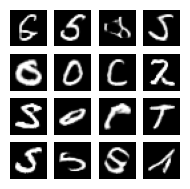

2/2 [==============================] - 0s 7ms/step
14501: Discriminator loss = 0.5742189884185791, accuracy = 0.671875
Adversial loss = 0.8154522180557251, accuracy = 0.46875
2/2 [==============================] - 0s 6ms/step
14502: Discriminator loss = 0.5906480550765991, accuracy = 0.7109375
Adversial loss = 1.080610990524292, accuracy = 0.28125
2/2 [==============================] - 0s 5ms/step
14503: Discriminator loss = 0.5884555578231812, accuracy = 0.703125
Adversial loss = 0.8276070356369019, accuracy = 0.359375
2/2 [==============================] - 0s 5ms/step
14504: Discriminator loss = 0.5549413561820984, accuracy = 0.703125
Adversial loss = 0.9738286733627319, accuracy = 0.359375
2/2 [==============================] - 0s 5ms/step
14505: Discriminator loss = 0.5766946077346802, accuracy = 0.7265625
Adversial loss = 0.9465748071670532, accuracy = 0.265625
2/2 [==============================] - 0s 5ms/step
14506: Discriminator loss = 0.6000814437866211, accuracy = 0.671875
Ad

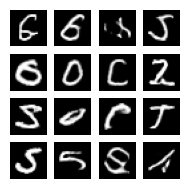

2/2 [==============================] - 0s 5ms/step
15001: Discriminator loss = 0.6097881197929382, accuracy = 0.6640625
Adversial loss = 0.9063671231269836, accuracy = 0.3125
2/2 [==============================] - 0s 7ms/step
15002: Discriminator loss = 0.5793483853340149, accuracy = 0.671875
Adversial loss = 1.3156133890151978, accuracy = 0.15625
2/2 [==============================] - 0s 7ms/step
15003: Discriminator loss = 0.6293025016784668, accuracy = 0.609375
Adversial loss = 0.8484197854995728, accuracy = 0.453125
2/2 [==============================] - 0s 5ms/step
15004: Discriminator loss = 0.616075873374939, accuracy = 0.6796875
Adversial loss = 1.2448203563690186, accuracy = 0.078125
2/2 [==============================] - 0s 8ms/step
15005: Discriminator loss = 0.5673918724060059, accuracy = 0.71875
Adversial loss = 0.9020301103591919, accuracy = 0.296875
2/2 [==============================] - 0s 7ms/step
15006: Discriminator loss = 0.5722720623016357, accuracy = 0.6796875
Adv

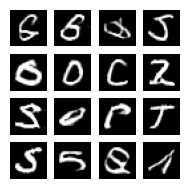

2/2 [==============================] - 0s 12ms/step
15501: Discriminator loss = 0.5067415237426758, accuracy = 0.7421875
Adversial loss = 0.7987024188041687, accuracy = 0.515625
2/2 [==============================] - 0s 5ms/step
15502: Discriminator loss = 0.4761887490749359, accuracy = 0.78125
Adversial loss = 0.8917198777198792, accuracy = 0.40625
2/2 [==============================] - 0s 6ms/step
15503: Discriminator loss = 0.4556635320186615, accuracy = 0.8046875
Adversial loss = 0.6742448806762695, accuracy = 0.625
2/2 [==============================] - 0s 7ms/step
15504: Discriminator loss = 0.520554780960083, accuracy = 0.7265625
Adversial loss = 0.9006658792495728, accuracy = 0.484375
2/2 [==============================] - 0s 7ms/step
15505: Discriminator loss = 0.5168085694313049, accuracy = 0.7421875
Adversial loss = 0.6156758069992065, accuracy = 0.640625
2/2 [==============================] - 0s 5ms/step
15506: Discriminator loss = 0.5433641076087952, accuracy = 0.6953125
A

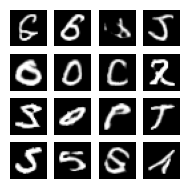

2/2 [==============================] - 0s 7ms/step
16001: Discriminator loss = 0.5041611194610596, accuracy = 0.8046875
Adversial loss = 1.2603508234024048, accuracy = 0.109375
2/2 [==============================] - 0s 6ms/step
16002: Discriminator loss = 0.538682222366333, accuracy = 0.7109375
Adversial loss = 1.2181159257888794, accuracy = 0.140625
2/2 [==============================] - 0s 5ms/step
16003: Discriminator loss = 0.5605124235153198, accuracy = 0.703125
Adversial loss = 0.9564179182052612, accuracy = 0.265625
2/2 [==============================] - 0s 8ms/step
16004: Discriminator loss = 0.4967952072620392, accuracy = 0.7734375
Adversial loss = 1.1535394191741943, accuracy = 0.203125
2/2 [==============================] - 0s 7ms/step
16005: Discriminator loss = 0.5215051174163818, accuracy = 0.7265625
Adversial loss = 0.9114041328430176, accuracy = 0.359375
2/2 [==============================] - 0s 5ms/step
16006: Discriminator loss = 0.4698130190372467, accuracy = 0.73437

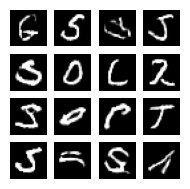

2/2 [==============================] - 0s 7ms/step
16501: Discriminator loss = 0.4717114567756653, accuracy = 0.78125
Adversial loss = 1.5014230012893677, accuracy = 0.171875
2/2 [==============================] - 0s 12ms/step
16502: Discriminator loss = 0.32562458515167236, accuracy = 0.875
Adversial loss = 1.668902039527893, accuracy = 0.09375
2/2 [==============================] - 0s 7ms/step
16503: Discriminator loss = 0.4043612480163574, accuracy = 0.8125
Adversial loss = 2.058628559112549, accuracy = 0.125
2/2 [==============================] - 0s 5ms/step
16504: Discriminator loss = 0.42301034927368164, accuracy = 0.7890625
Adversial loss = 1.3366947174072266, accuracy = 0.1875
2/2 [==============================] - 0s 8ms/step
16505: Discriminator loss = 0.5462162494659424, accuracy = 0.7265625
Adversial loss = 2.441591501235962, accuracy = 0.0
2/2 [==============================] - 0s 6ms/step
16506: Discriminator loss = 0.48029470443725586, accuracy = 0.7578125
Adversial loss

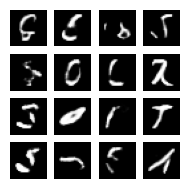

2/2 [==============================] - 0s 6ms/step
17001: Discriminator loss = 0.21452423930168152, accuracy = 0.9140625
Adversial loss = 0.1472731977701187, accuracy = 0.953125
2/2 [==============================] - 0s 7ms/step
17002: Discriminator loss = 0.1940375566482544, accuracy = 0.921875
Adversial loss = 0.3596786856651306, accuracy = 0.796875
2/2 [==============================] - 0s 5ms/step
17003: Discriminator loss = 0.2930850088596344, accuracy = 0.8515625
Adversial loss = 0.06648442894220352, accuracy = 0.96875
2/2 [==============================] - 0s 5ms/step
17004: Discriminator loss = 0.36053672432899475, accuracy = 0.7890625
Adversial loss = 1.1288633346557617, accuracy = 0.5
2/2 [==============================] - 0s 7ms/step
17005: Discriminator loss = 0.366993248462677, accuracy = 0.8125
Adversial loss = 0.22350190579891205, accuracy = 0.90625
2/2 [==============================] - 0s 5ms/step
17006: Discriminator loss = 0.41093194484710693, accuracy = 0.8203125
Ad

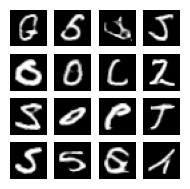

2/2 [==============================] - 0s 7ms/step
17501: Discriminator loss = 0.50551837682724, accuracy = 0.7109375
Adversial loss = 2.0080575942993164, accuracy = 0.0
2/2 [==============================] - 0s 8ms/step
17502: Discriminator loss = 0.4917964041233063, accuracy = 0.7578125
Adversial loss = 1.013528823852539, accuracy = 0.28125
2/2 [==============================] - 0s 5ms/step
17503: Discriminator loss = 0.4609506130218506, accuracy = 0.8046875
Adversial loss = 1.420750617980957, accuracy = 0.078125
2/2 [==============================] - 0s 6ms/step
17504: Discriminator loss = 0.36110395193099976, accuracy = 0.84375
Adversial loss = 1.4347261190414429, accuracy = 0.0625
2/2 [==============================] - 0s 7ms/step
17505: Discriminator loss = 0.41430050134658813, accuracy = 0.796875
Adversial loss = 1.5702402591705322, accuracy = 0.03125
2/2 [==============================] - 0s 5ms/step
17506: Discriminator loss = 0.39586809277534485, accuracy = 0.7890625
Adversia

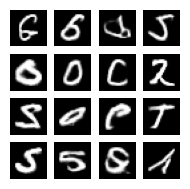

2/2 [==============================] - 0s 5ms/step
18001: Discriminator loss = 0.5550194978713989, accuracy = 0.703125
Adversial loss = 1.3915176391601562, accuracy = 0.203125
2/2 [==============================] - 0s 6ms/step
18002: Discriminator loss = 0.46778854727745056, accuracy = 0.75
Adversial loss = 0.33523908257484436, accuracy = 0.90625
2/2 [==============================] - 0s 7ms/step
18003: Discriminator loss = 0.49251726269721985, accuracy = 0.7890625
Adversial loss = 0.9884210824966431, accuracy = 0.359375
2/2 [==============================] - 0s 6ms/step
18004: Discriminator loss = 0.46009165048599243, accuracy = 0.7734375
Adversial loss = 0.3601700961589813, accuracy = 0.890625
2/2 [==============================] - 0s 11ms/step
18005: Discriminator loss = 0.346520334482193, accuracy = 0.8359375
Adversial loss = 0.733879566192627, accuracy = 0.484375
2/2 [==============================] - 0s 7ms/step
18006: Discriminator loss = 0.4760131239891052, accuracy = 0.734375


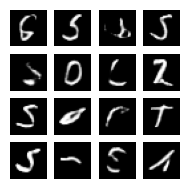

2/2 [==============================] - 0s 5ms/step
18501: Discriminator loss = 0.2016831934452057, accuracy = 0.8984375
Adversial loss = 0.16088169813156128, accuracy = 0.9375
2/2 [==============================] - 0s 7ms/step
18502: Discriminator loss = 0.17467935383319855, accuracy = 0.9140625
Adversial loss = 0.09178386628627777, accuracy = 0.96875
2/2 [==============================] - 0s 5ms/step
18503: Discriminator loss = 0.23524942994117737, accuracy = 0.90625
Adversial loss = 0.24422600865364075, accuracy = 0.90625
2/2 [==============================] - 0s 7ms/step
18504: Discriminator loss = 0.13314223289489746, accuracy = 0.9609375
Adversial loss = 0.10697701573371887, accuracy = 1.0
2/2 [==============================] - 0s 5ms/step
18505: Discriminator loss = 0.1856442242860794, accuracy = 0.921875
Adversial loss = 0.15498432517051697, accuracy = 0.921875
2/2 [==============================] - 0s 7ms/step
18506: Discriminator loss = 0.17729391157627106, accuracy = 0.929687

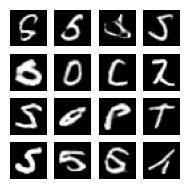

2/2 [==============================] - 0s 7ms/step
19001: Discriminator loss = 0.38267871737480164, accuracy = 0.8203125
Adversial loss = 2.1241817474365234, accuracy = 0.0
2/2 [==============================] - 0s 4ms/step
19002: Discriminator loss = 0.3427087664604187, accuracy = 0.84375
Adversial loss = 1.337233543395996, accuracy = 0.09375
2/2 [==============================] - 0s 5ms/step
19003: Discriminator loss = 0.4822024703025818, accuracy = 0.78125
Adversial loss = 1.778550148010254, accuracy = 0.109375
2/2 [==============================] - 0s 8ms/step
19004: Discriminator loss = 0.47222256660461426, accuracy = 0.7578125
Adversial loss = 1.2690335512161255, accuracy = 0.140625
2/2 [==============================] - 0s 7ms/step
19005: Discriminator loss = 0.42535245418548584, accuracy = 0.78125
Adversial loss = 2.0694198608398438, accuracy = 0.03125
2/2 [==============================] - 0s 15ms/step
19006: Discriminator loss = 0.45844608545303345, accuracy = 0.7734375
Adver

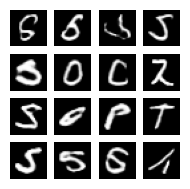

2/2 [==============================] - 0s 6ms/step
19501: Discriminator loss = 0.47459036111831665, accuracy = 0.7890625
Adversial loss = 2.2565364837646484, accuracy = 0.046875
2/2 [==============================] - 0s 8ms/step
19502: Discriminator loss = 0.48843610286712646, accuracy = 0.75
Adversial loss = 0.9849556684494019, accuracy = 0.484375
2/2 [==============================] - 0s 7ms/step
19503: Discriminator loss = 0.4622396230697632, accuracy = 0.8046875
Adversial loss = 1.9517850875854492, accuracy = 0.03125
2/2 [==============================] - 0s 6ms/step
19504: Discriminator loss = 0.42479050159454346, accuracy = 0.78125
Adversial loss = 0.9979808330535889, accuracy = 0.359375
2/2 [==============================] - 0s 5ms/step
19505: Discriminator loss = 0.43770313262939453, accuracy = 0.8046875
Adversial loss = 1.7723195552825928, accuracy = 0.078125
2/2 [==============================] - 0s 6ms/step
19506: Discriminator loss = 0.4359802305698395, accuracy = 0.75
Adve

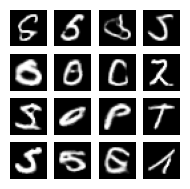

In [20]:
train(x_train, generator, discriminator, adversial, batch_size, latent_dim, 20000)

4/4 [==============================] - 0s 70ms/step


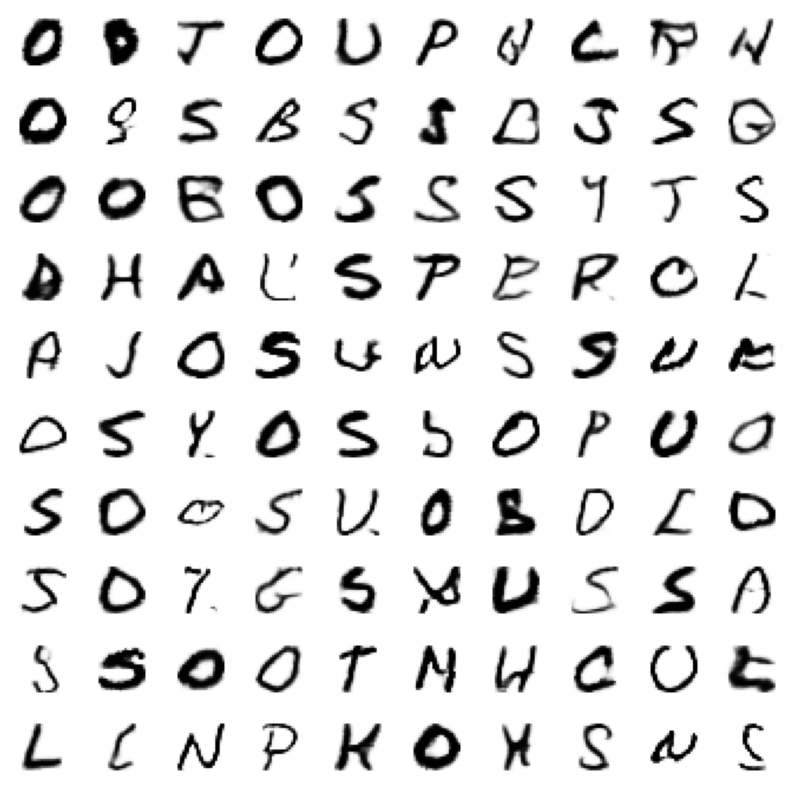

In [21]:
noise = np.random.uniform(-1.0, 1.0, size=[100, latent_dim])
images = generator.predict(noise)
plt.figure(figsize=(10, 10))
for i in range(100):
    image = np.reshape(images[i], [images.shape[1], images.shape[1]])
    ax = plt.subplot(10, 10, i + 1)
    plt.imshow(image, cmap="Greys")
    plt.axis("off")
plt.show()